**WEB SCRAPING**

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

Creating emply lists

In [ ]:
reviews = []
stars = []
date = []
country = []

Scraping the data from the web and appending them into columns (the empty lists)

In [ ]:
#Iterating through a range of numbers from 1 to 36 using the range function:
for i in range(1, 36):

  #Sending an HTTP GET request to the specified URL for each iteration:
  #This code snippet uses the requests library to send a GET request to a specific page on the website. The page URL is constructed using an f-string, where {i} is replaced with the current iteration value. This allows the code to scrape reviews from multiple pages by incrementing the page number.
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")

  #Creating a BeautifulSoup object from the page content:
  #This code uses the BeautifulSoup library to parse the HTML content of the page obtained from the GET request. The page.content contains the HTML response, and "html5" specifies the parser to use.
    soup = BeautifulSoup(page.content, "html5")


   #Extracting the review text:
   #Here, the code searches for all <div> elements with the class name "text_content" using soup.find_all(). It then extracts the text within each matching <div> element and appends it to the reviews list.
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)

    #Extracting the star ratings:
    #Similarly, this code searches for all <div> elements with the class name "rating-10". It tries to extract the text within the <span> element present in each matching <div> element using item.span.text. If an error occurs during this process, it prints an error message indicating the page number (i) where the error occurred and appends the string "None" to the stars list.
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")

    #Extracting the review dates:
    for item in soup.find_all("time"):
        date.append(item.text)

    #country
    #Here, the code searches for all <h3> elements on the page. It then finds the text within the <span> element that follows each <h3> element and strips any parentheses and leading/trailing whitespace using text.strip(" ()"). The extracted country names are appended to the country list.
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 32
Error on page 33
Error on page 33
Error on page 35


Counting the length of each column and equating all the lengths to minimum length

In [ ]:
len(reviews)

3500

In [ ]:
len(country)

3500

In [ ]:
len(stars)

3535

In [ ]:
min_length = min(len(reviews), len(stars), len(date), len(country))
reviews = reviews[:min_length]
stars = stars[:min_length]
date = date[:min_length]
country = country[:min_length]

Creating the data frame

In [ ]:
df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country})

In [ ]:
df.head()

,reviews,stars,date,country
0,Not Verified | Cabin luggage had to go to carg...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,21st October 2023,Netherlands
1,✅ Trip Verified | I have been using BA for a ...,3,21st October 2023,United Kingdom
2,✅ Trip Verified | I flew from Istanbul to Lo...,4,19th October 2023,United Kingdom
3,Not Verified | I have flow on BA several time...,1,19th October 2023,United States
4,✅ Trip Verified | The flight departed over a...,1,17th October 2023,United Kingdom


In [ ]:
df.shape

(3500, 4)

Downloading the file as csv

In [ ]:
import os

cwd = os.getcwd()
df.to_csv(cwd+ "/BA_reviews.csv")

**Data Cleaning**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [ ]:
cwd = os.getcwd()
df = pd.read_csv(cwd+ "/BA_reviews.csv", index_col = 0)

In [ ]:
df.head()

,reviews,stars,date,country
0,Not Verified | Cabin luggage had to go to carg...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,21st October 2023,Netherlands
1,✅ Trip Verified | I have been using BA for a ...,3,21st October 2023,United Kingdom
2,✅ Trip Verified | I flew from Istanbul to Lo...,4,19th October 2023,United Kingdom
3,Not Verified | I have flow on BA several time...,1,19th October 2023,United States
4,✅ Trip Verified | The flight departed over a...,1,17th October 2023,United Kingdom


In [ ]:
df['verified'] = df.reviews.str.contains('Trip Verified')

In [ ]:
df['verified']

0       False
1        True
2        True
3       False
4        True
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Name: verified, Length: 3500, dtype: bool

In [ ]:
df.head()

,reviews,stars,date,country,verified
0,Not Verified | Cabin luggage had to go to carg...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,21st October 2023,Netherlands,False
1,✅ Trip Verified | I have been using BA for a ...,3,21st October 2023,United Kingdom,True
2,✅ Trip Verified | I flew from Istanbul to Lo...,4,19th October 2023,United Kingdom,True
3,Not Verified | I have flow on BA several time...,1,19th October 2023,United States,False
4,✅ Trip Verified | The flight departed over a...,1,17th October 2023,United Kingdom,True


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import re

#it downloads the stopwords list and the WordNet lexical database, which are needed for stopwords removal and lemmatization.
nltk.download('stopwords')
nltk.download('wordnet')

#This line initializes an instance of WordNetLemmatizer, which will be used for lemmatizing words.
lemma = WordNetLemmatizer()

#This line takes the 'reviews' column from a DataFrame named 'df', and it strips the specified characters ('✅ Trip Verified |') from the beginning and end of each review in the column. The resulting series is stored in the variable 'reviews_data'.
reviews_data = df.reviews.str.strip('✅ Trip Verified |')

corpus = []

#This is a loop that iterates through each review in 'reviews_data' and performs several text preprocessing steps:
#1. re.sub('[^a-zA-Z]',' ', rev): This line uses the re.sub() function to replace any characters that are not letters with a space. This step helps in removing non-alphabetic characters.
#2. rev.lower(): Converts the review to lowercase.
#3. rev.split(): Splits the review into a list of words.
#4. [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]: Lemmatizes each word in the review (except stopwords) using the initialized lemmatizer.
#5. " ".join(rev): Joins the processed words back into a single string with words separated by spaces.
#6. corpus.append(rev): Appends the processed review to the 'corpus' list.

for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df["corpus"] = corpus

In [ ]:
df.head()

,reviews,stars,date,country,verified,corpus
0,Not Verified | Cabin luggage had to go to carg...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,21st October 2023,Netherlands,False,verified cabin luggage go cargo even said carr...
1,✅ Trip Verified | I have been using BA for a ...,3,21st October 2023,United Kingdom,True,using ba average cannot say pretty satisfied b...
2,✅ Trip Verified | I flew from Istanbul to Lo...,4,19th October 2023,United Kingdom,True,flew istanbul london business class half fligh...
3,Not Verified | I have flow on BA several time...,1,19th October 2023,United States,False,verified flow ba several time since airline st...
4,✅ Trip Verified | The flight departed over a...,1,17th October 2023,United Kingdom,True,flight departed hour late due late inbound pla...


Cleaning/Format Date


In [ ]:
df.dtypes

reviews     object
stars       object
date        object
country     object
verified      bool
corpus      object
dtype: object

In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
df.date.head()

0   2023-10-21
1   2023-10-21
2   2023-10-19
3   2023-10-19
4   2023-10-17
Name: date, dtype: datetime64[ns]

Cleaning ratings with stars

In [ ]:
df.stars.unique()


array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '3', '4', '1', '5', '2', '10',
       '6', '8', '7', '9', 'None'], dtype=object)

In [ ]:
df.stars = df.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [ ]:
df.stars.value_counts()

1       839
2       407
3       390
8       340
10      293
9       284
7       283
5       250
4       240
6       171
None      3
Name: stars, dtype: int64

In [ ]:
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)

In [ ]:
df.stars.unique()

array(['5', '3', '4', '1', '2', '10', '6', '8', '7', '9'], dtype=object)

Check for Null values

In [ ]:
df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     3495
                       True     False     False        2
dtype: int64

In [ ]:
df.country.isnull().value_counts()

False    3495
True        2
Name: country, dtype: int64

In [ ]:
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [ ]:
df.shape

(3495, 6)

In [ ]:
df.reset_index(drop=True)

,reviews,stars,date,country,verified,corpus
0,Not Verified | Cabin luggage had to go to carg...,5,2023-10-21,Netherlands,False,verified cabin luggage go cargo even said carr...
1,✅ Trip Verified | I have been using BA for a ...,3,2023-10-21,United Kingdom,True,using ba average cannot say pretty satisfied b...
2,✅ Trip Verified | I flew from Istanbul to Lo...,4,2023-10-19,United Kingdom,True,flew istanbul london business class half fligh...
3,Not Verified | I have flow on BA several time...,1,2023-10-19,United States,False,verified flow ba several time since airline st...
4,✅ Trip Verified | The flight departed over a...,1,2023-10-17,United Kingdom,True,flight departed hour late due late inbound pla...
...,...,...,...,...,...,...
3490,I have used BA over the past 20 years as I cho...,7,2014-07-29,Canada,False,used ba past year chose move airmiles plan reg...
3491,Flight BA935 DUS-LHR on 31/5/2014 onboard G-EU...,1,2014-07-29,Netherlands,False,flight ba dus lhr onboard g eupu flight time s...
3492,Flight BA283 LHR-LAX on 31/5/2014 onboard G-XL...,7,2014-07-29,Netherlands,False,flight ba lhr lax onboard g xlee flight punctu...
3493,Round-trip with family from JFK to HYD via LHR...,8,2014-07-29,United States,False,round trip family jfk hyd via lhr onward fligh...


In [ ]:
df.to_csv(cwd + "/cleaned-BA-reviews.csv")

**Exploratory Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [ ]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

In [ ]:
df.head()

,reviews,stars,date,country,verified,corpus
0,Not Verified | Cabin luggage had to go to carg...,5,2023-10-21,Netherlands,False,verified cabin luggage go cargo even said carr...
1,✅ Trip Verified | I have been using BA for a ...,3,2023-10-21,United Kingdom,True,using ba average cannot say pretty satisfied b...
2,✅ Trip Verified | I flew from Istanbul to Lo...,4,2023-10-19,United Kingdom,True,flew istanbul london business class half fligh...
3,Not Verified | I have flow on BA several time...,1,2023-10-19,United States,False,verified flow ba several time since airline st...
4,✅ Trip Verified | The flight departed over a...,1,2023-10-17,United Kingdom,True,flight departed hour late due late inbound pla...


In [ ]:
df.stars.mean() #Average overall rating for Bristish airways

4.64549356223176

In [ ]:
unique_countries = df['country'].nunique()
print("Number of unique countries:", unique_countries)

Number of unique countries: 69


Text(0.5, 0.98, 'Counts for each ratings')

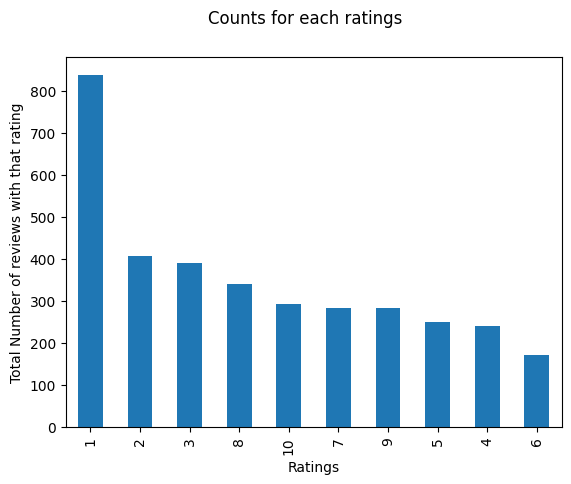

In [ ]:
#Counts for each rating
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [ ]:
#Maximum number of reviews by country
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [ ]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

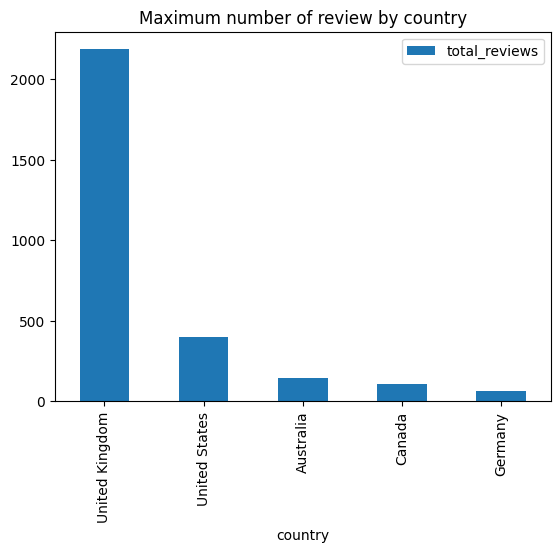

In [ ]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

**Top 12 Countries with avg highest rating provided to British Airways**

In [ ]:
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()

<ipython-input-45-d2bd358aa525>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()


In [ ]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

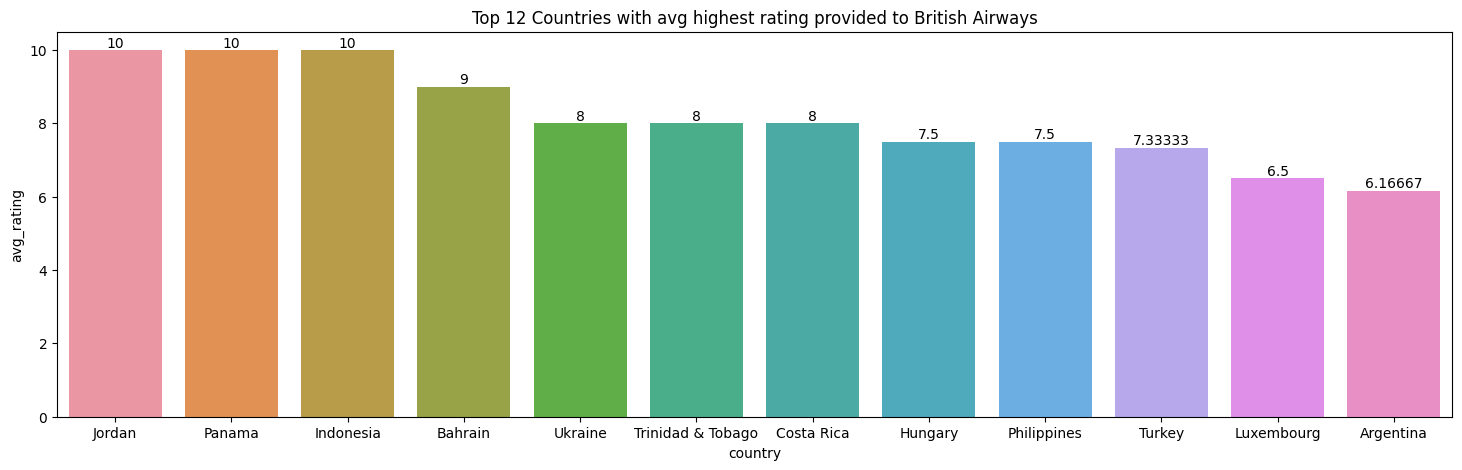

In [ ]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

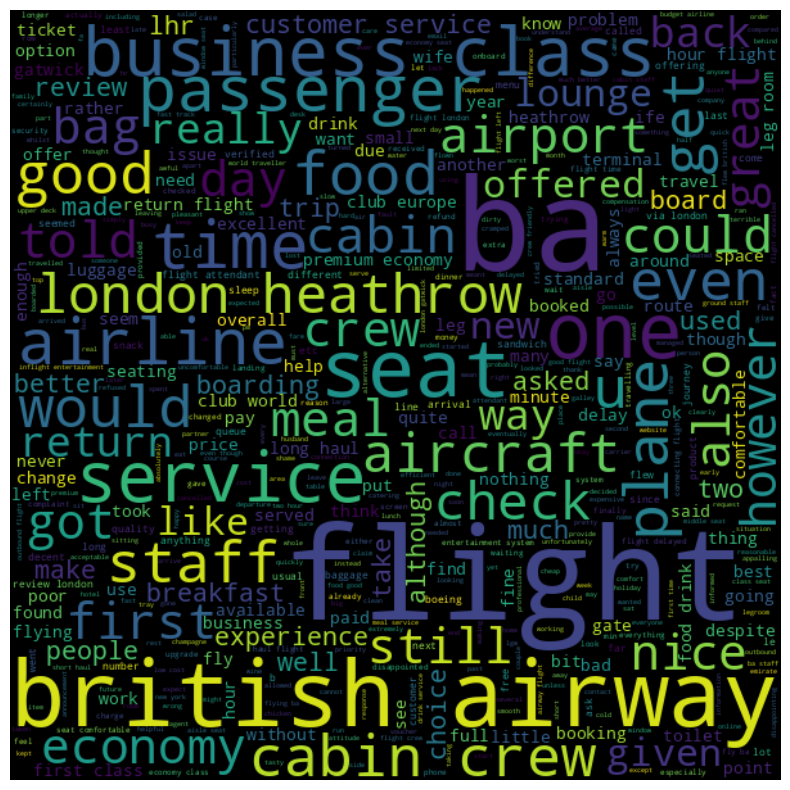

In [ ]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



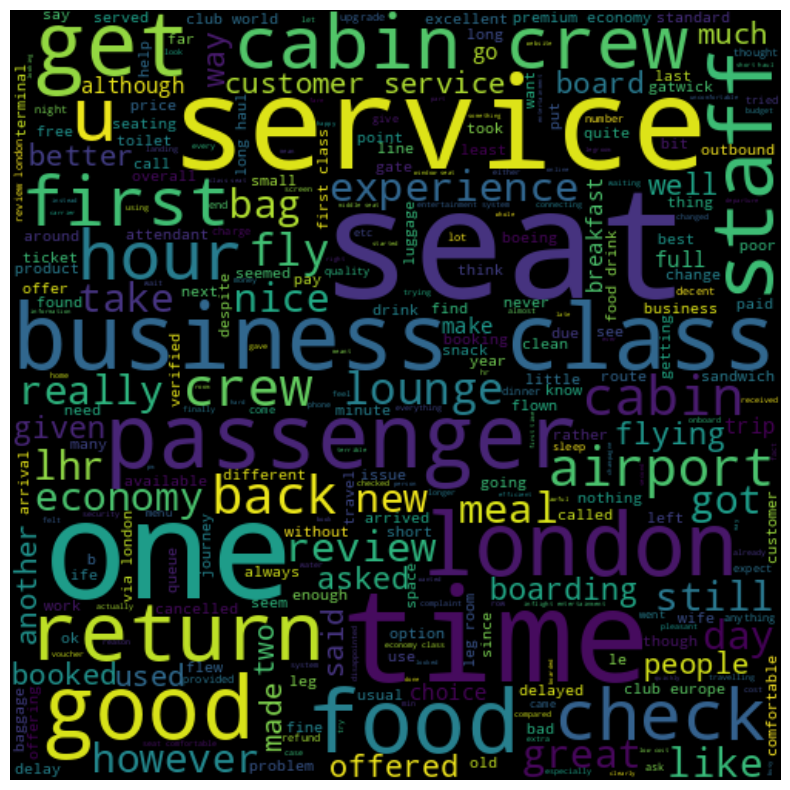

In [ ]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'lounge'),
  Text(16, 0, 'club'),
  Text(17, 0, 'return'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'customer')])

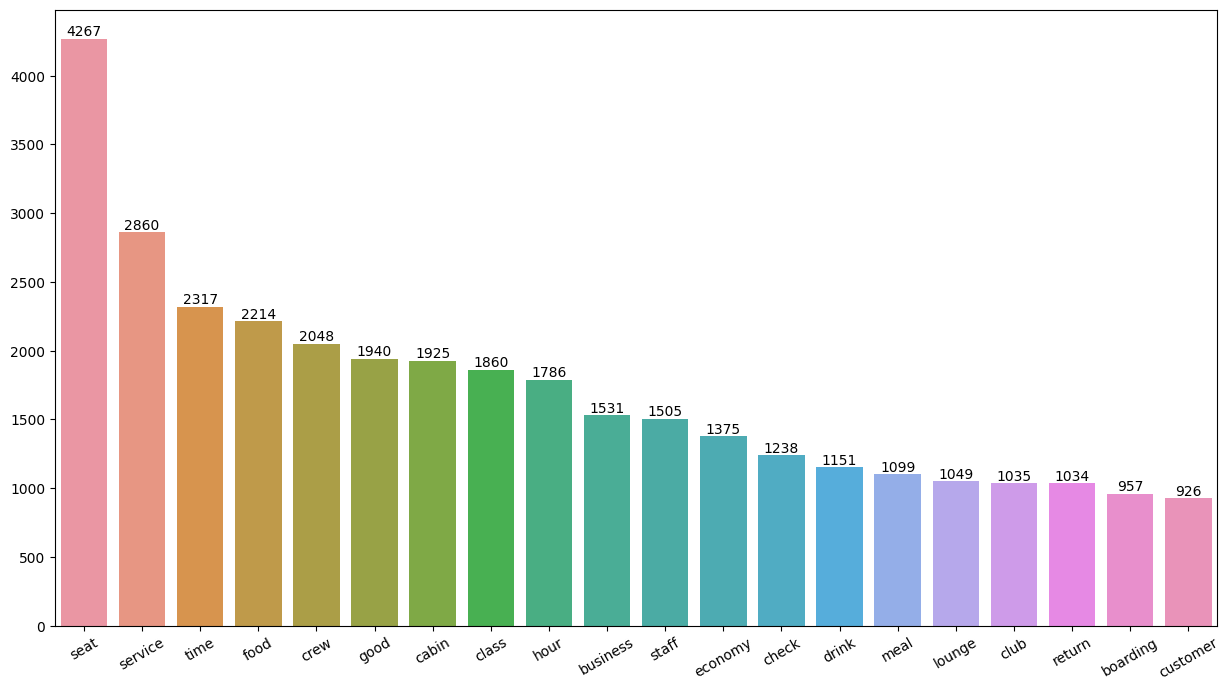

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

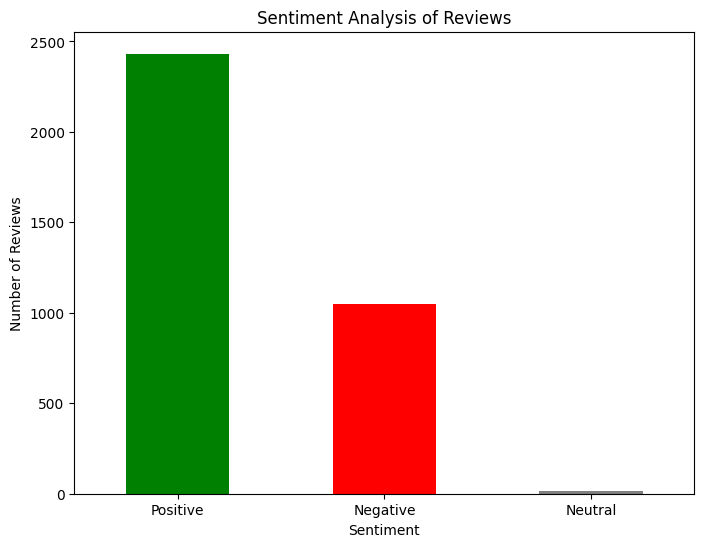

In [ ]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt


# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    elif sentiment_score == 0:
        return 'Neutral'

# Apply sentiment analysis to the 'reviews' column
df['sentiment'] = df['reviews'].apply(analyze_sentiment)

# Count the number of each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Create a bar plot for sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


Word frequency

<Axes: >

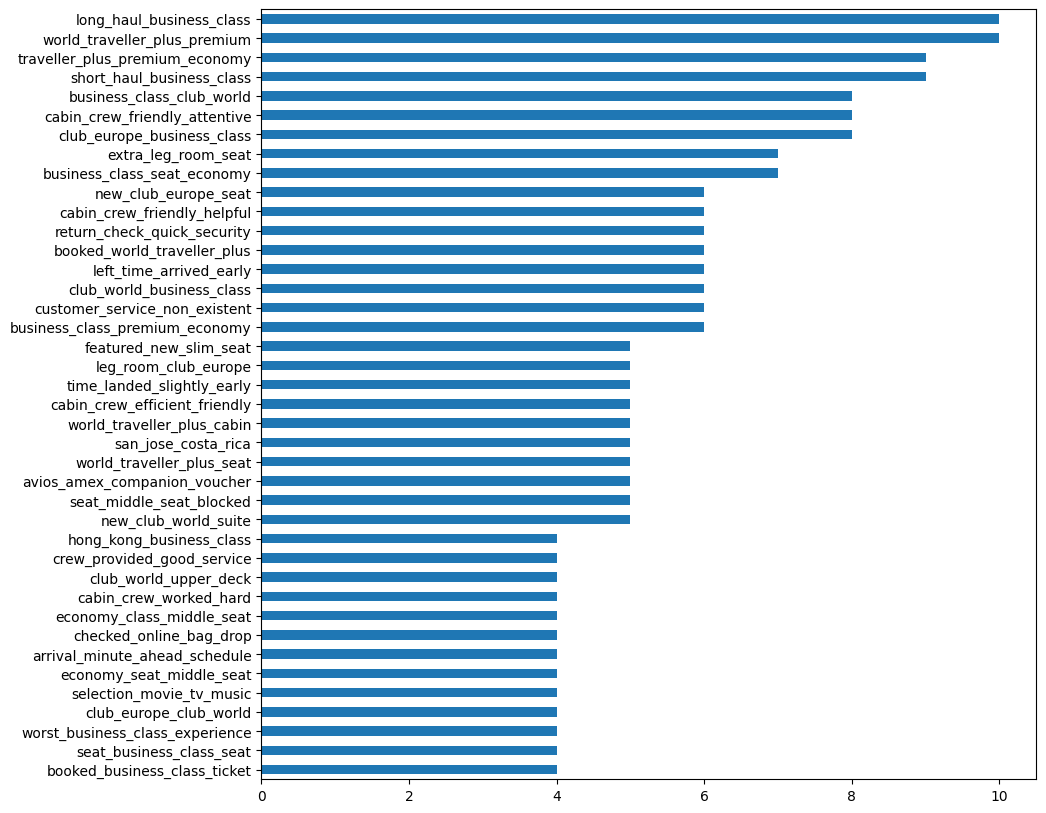

In [ ]:

## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams

    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax


get_freq_dist(new_words,4)

In [ ]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

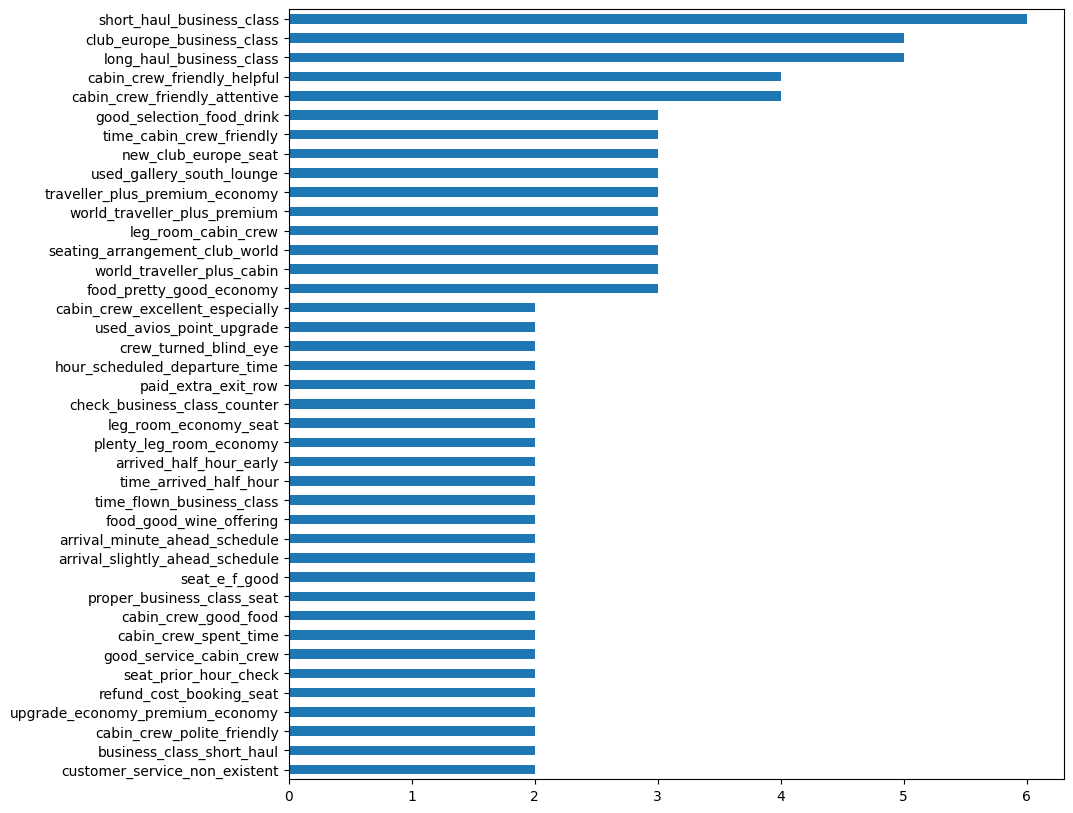

In [ ]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

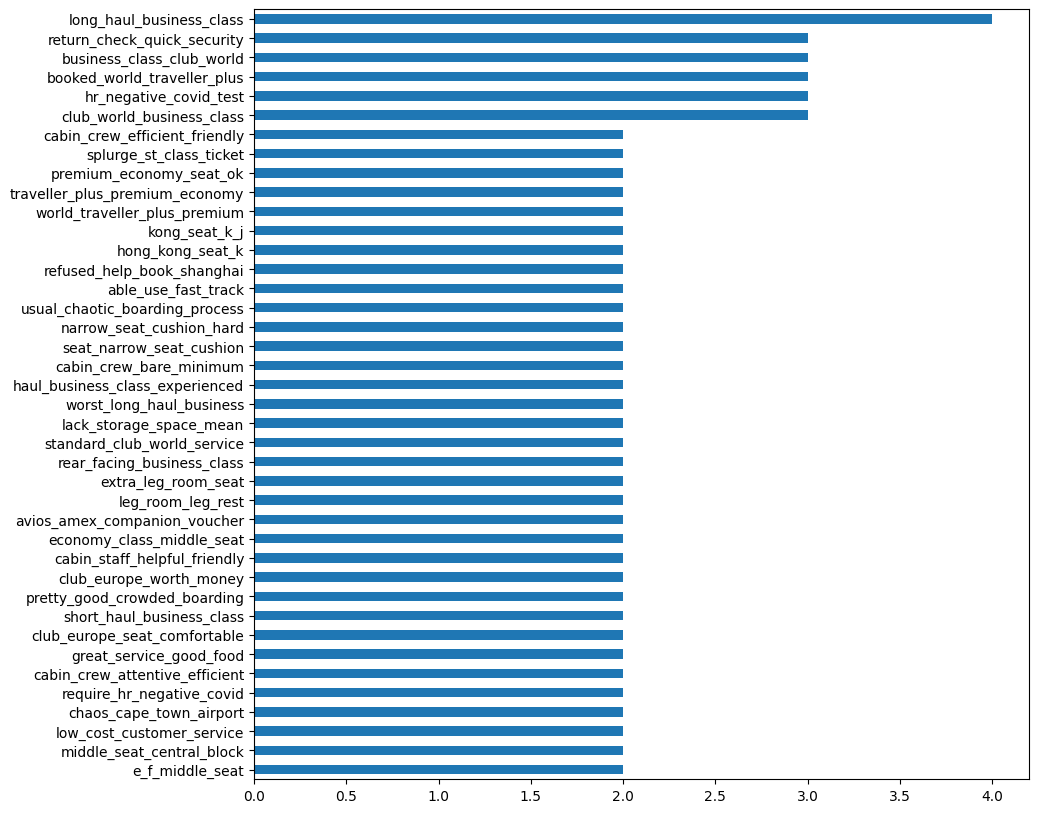

In [ ]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

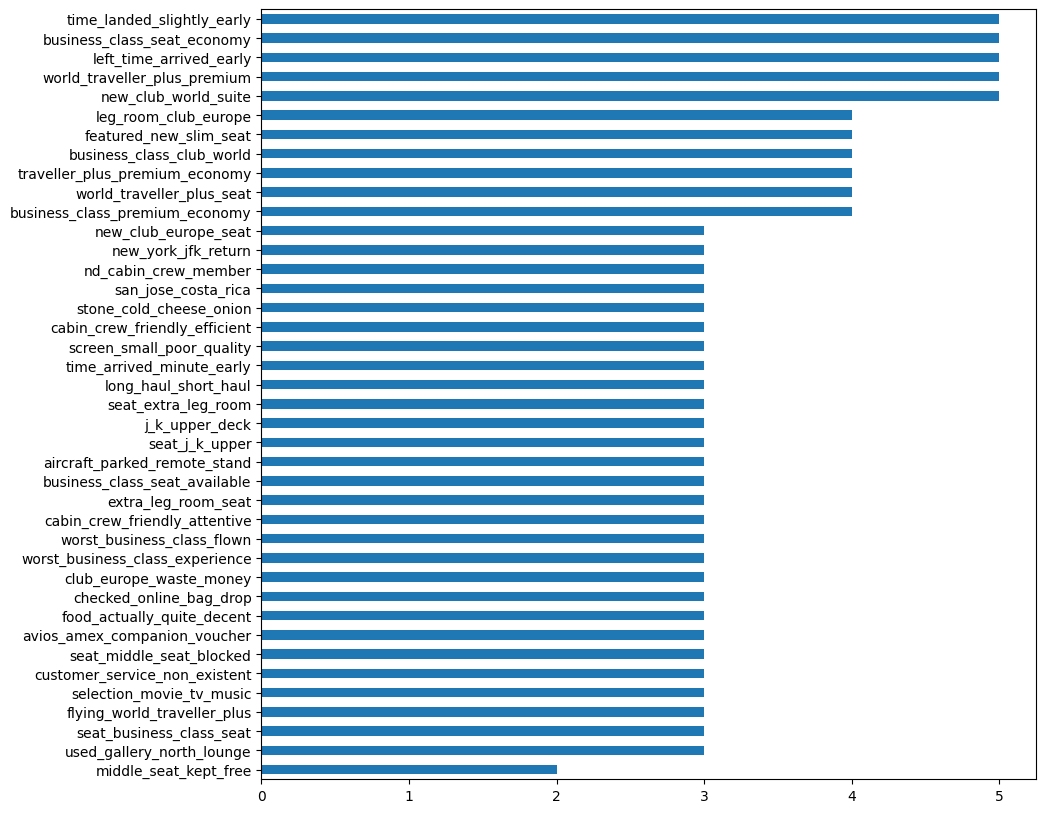

In [ ]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

**EDA on Customer Booking Dataset**

In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customerbooking_df = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')

In [ ]:
customerbooking_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
customerbooking_df.shape

(50000, 14)

In [ ]:
customerbooking_df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


Sales channel

In [ ]:
internet = customerbooking_df.sales_channel.value_counts().values[0]/customerbooking_df.sales_channel.count()*100
print(internet)
mobile = customerbooking_df.sales_channel.value_counts().values[1]/customerbooking_df.sales_channel.count()*100
print(mobile)


88.764
11.236


Trip type

In [ ]:
round_trip = customerbooking_df.trip_type.value_counts().values[0]/customerbooking_df.trip_type.count()*100
print(round_trip)
circle_trip = customerbooking_df.trip_type.value_counts().values[1]/customerbooking_df.trip_type.count()*100
print(circle_trip)
oneway_trip = customerbooking_df.trip_type.value_counts().values[2]/customerbooking_df.trip_type.count()*100
print(oneway_trip)


98.994
0.774
0.232


Purchase Lead


<Axes: xlabel='purchase_lead', ylabel='Count'>

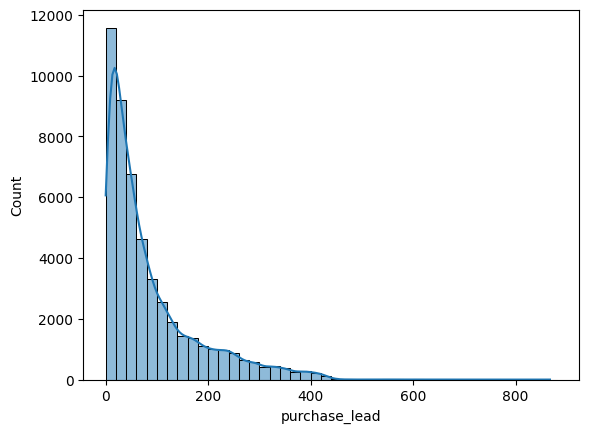

In [ ]:
plt.figure()
sns.histplot(data=customerbooking_df, x="purchase_lead", binwidth=20,kde=True)

People took time to purchase ticket. the 'purchase_lead' column indicates the number of days between the date when the customer first searched for flights, and the date when they actually completed the booking/purchase

Flight day

<Axes: xlabel='flight_day', ylabel='Count'>

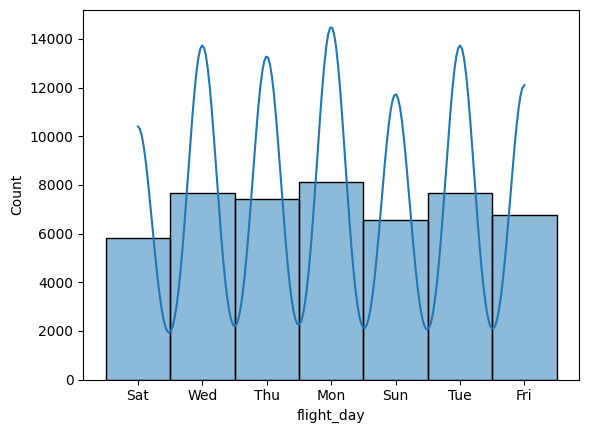

In [ ]:
plt.figure()
sns.histplot(data=customerbooking_df, x="flight_day", binwidth=20,kde=True)

In [ ]:
#filtering the data to have only length of stay days less than 500 days
customerbooking_df = customerbooking_df[customerbooking_df.purchase_lead <500]

In [ ]:
successful_booking_per = customerbooking_df.booking_complete.value_counts().values[0] / len(customerbooking_df) * 100

In [ ]:
unsuccessful_booking_per = 100-successful_booking_per

In [ ]:
print(f"Out of 50000 booking entries only {round(unsuccessful_booking_per,2)} % bookings were successfull or complete.")

Out of 50000 booking entries only 14.96 % bookings were successfull or complete.


In [ ]:
customerbooking_df.to_csv(cwd + "/filtered_customer_booking.csv")

**PREDICTIVE MODELLING**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('filtered_customer_booking.csv')

# Encode categorical variables
encoder = LabelEncoder()
categorical_cols = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# Define features (X) and target (y)
X = data.drop(columns=['booking_complete'])
y = data['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.857557267180154
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92      8540
           1       0.56      0.11      0.18      1457

    accuracy                           0.86      9997
   macro avg       0.71      0.55      0.55      9997
weighted avg       0.82      0.86      0.81      9997

Confusion Matrix:
 [[8416  124]
 [1300  157]]


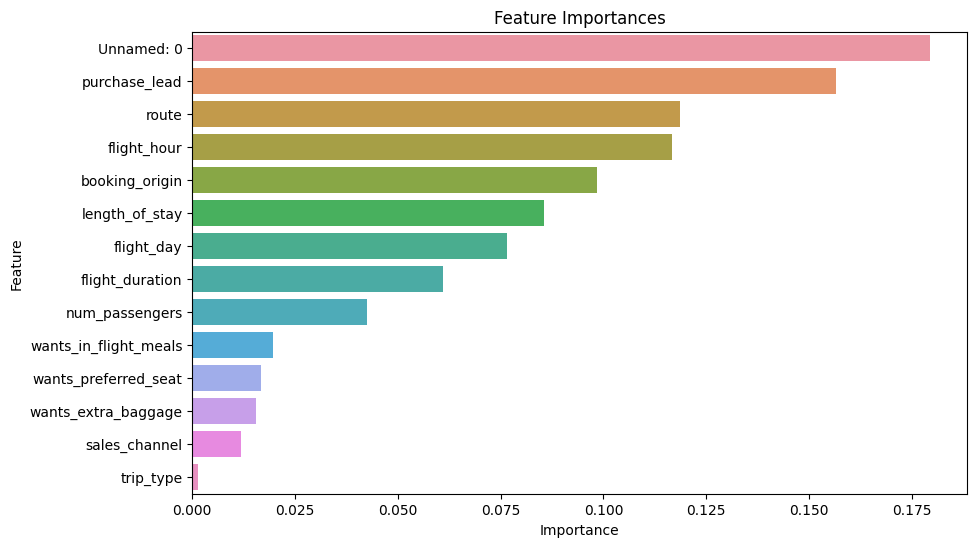

In [ ]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
data = pd.read_csv('filtered_customer_booking.csv')

# Encode categorical variables
encoder = LabelEncoder()
categorical_cols = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

# Ensure all possible categories are encoded during training
for col in categorical_cols:
    encoder.fit(data[col])

for col in categorical_cols:
    data[col] = encoder.transform(data[col])

# Define features (X) and target (y)
X = data.drop(columns=['booking_complete'])
y = data['booking_complete']

# Create and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

# Function to predict booking based on user input
def predict_booking(user_input):
    # Ensure the input data matches the order and format used during training
    user_df = pd.DataFrame(user_input, columns=X.columns)

    # Encode categorical variables, handling unknown categories
    for col in categorical_cols:
        user_df[col] = user_df[col].apply(lambda x: encoder.transform([x])[0] if x in encoder.classes_ else -1)

    # Predict if the customer will make a booking
    prediction = rf_classifier.predict(user_df)

    return prediction[0]

# Input some data for prediction
user_input = {
    'sales_channel': ['Internet'],
    'trip_type': ['RoundTrip'],
    'flight_day': ['Sat'],
    'route': ['AKLDEL'],
    'booking_origin': ['New Zealand'],
    'wants_extra_baggage': [1],
    'wants_preferred_seat': [0],
    'wants_in_flight_meals': [0],
}

# Predict if the customer will make a booking
prediction = predict_booking(user_input)

if prediction == 1:
    print("The customer is likely to make a booking.")
else:
    print("The customer is unlikely to make a booking.")



ValueError: ignored